<a href="https://colab.research.google.com/github/Pendota-sukumar/Sukumar-Pendota/blob/main/Apache_Spark_automated_Data_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install required libraries**

In [1]:
!pip install pyspark


**Initialize Apache Spark**

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType, FloatType
from pyspark.sql.functions import col

spark = SparkSession.builder \
    .appName("FinancialDataProcessing") \
    .getOrCreate()

**Manually define the schema of financial_data (since SQL execution is not supported directly)**

In [8]:
schema = StructType([
    StructField("id", IntegerType(), False),
    StructField("transaction_date", DateType(), False),
    StructField("account_number", StringType(), False),
    StructField("transaction_type", StringType(), False),
    StructField("amount", FloatType(), False),
    StructField("currency", StringType(), False),
    StructField("category", StringType(), False),
    StructField("status", StringType(), False)
])

**Load data from CSV (which manually saved financial_data.csv in Google**

In [9]:
sql_file_path = "/content/drive/MyDrive/Colab Notebooks/Source Data/financial_data (1).sql"

In [11]:
df = spark.read.format("csv").option("header", "true").schema(schema).load(sql_file_path)


**Transform data (Example: Filter only 'Completed' transactions)**

In [12]:
transformed_df = df.filter(col("status") == "Completed")

**Save transformed data as CSV back to Google Drive**

In [13]:
output_path = "/content/drive/MyDrive/Colab Notebooks/Target Data/Transformed financial_data.csv"
transformed_df.write.mode("overwrite").option("header", "true").csv(output_path)

In [14]:
print(f"Transformed data saved at: {output_path}")

Transformed data saved at: /content/drive/MyDrive/Colab Notebooks/Target Data/Transformed financial_data.csv


**Visualization Code in Google Colab**

In [38]:
!pip install matplotlib seaborn pandas
!pip install pyspark


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

** Load the transformed CSV file from Google Drive**

In [39]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Target Data/Transformed financial_data.csv"
df = pd.read_csv(file_path)

**Display first 5 rows**

In [40]:
print(df.head())

   id transaction_date account_number transaction_type   amount currency  \
0   1       2024-01-01        ACC1000           Credit  1000.00      USD   
1   2       2024-01-02        ACC1001            Debit  1005.75      USD   
2   3       2024-01-03        ACC1002           Credit  1011.50      USD   
3   4       2024-01-04        ACC1003            Debit  1017.25      USD   
4   5       2024-01-05        ACC1004           Credit  1023.00      USD   

   category     status  
0    Salary    Pending  
1  Shopping  Completed  
2     Bills  Completed  
3    Salary  Completed  
4  Shopping    Pending  


**Set style**

In [41]:
sns.set(style="whitegrid")

** Verify available columns before transformation**

In [42]:
print("Before transformation:", df.columns)

Before transformation: Index(['id', 'transaction_date', 'account_number', 'transaction_type',
       'amount', 'currency', 'category', 'status'],
      dtype='object')


In [45]:
import os

file_path = "/content/drive/MyDrive/Colab Notebooks/Target Data/Transformed financial_data.csv"

if os.path.exists(file_path):
    print("✅ File found:", file_path)
else:
    print("❌ File not found! Check if the path is correct.")


✅ File found: /content/drive/MyDrive/Colab Notebooks/Target Data/Transformed financial_data.csv


** Transaction Amount Distribution (Histogram)**

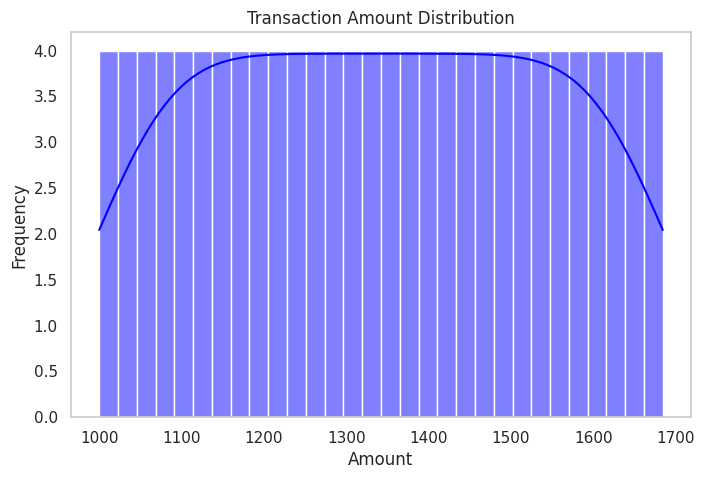

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["amount"], bins=30, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()


**Transactions by Category (Bar Chart)**

<ipython-input-47-926c9f54f95f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="coolwarm")


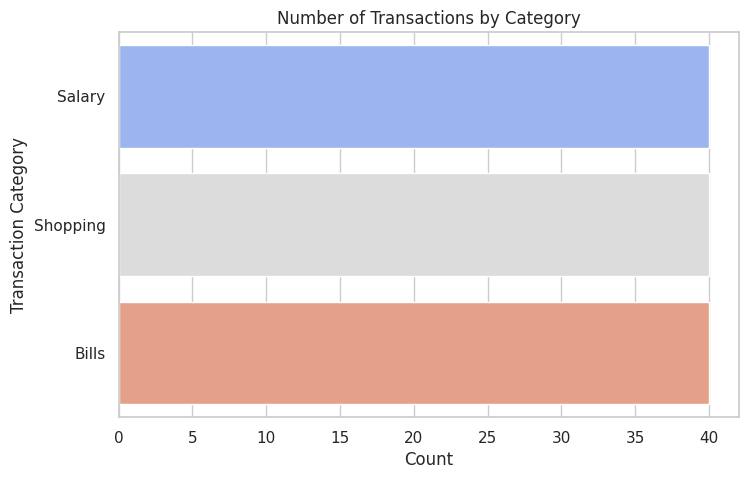

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="coolwarm")
plt.title("Number of Transactions by Category")
plt.xlabel("Count")
plt.ylabel("Transaction Category")
plt.show()


**Total Amount by Transaction Type (Bar Chart)**

<ipython-input-48-d5cd0c74db2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("transaction_type")["amount"].sum().index,


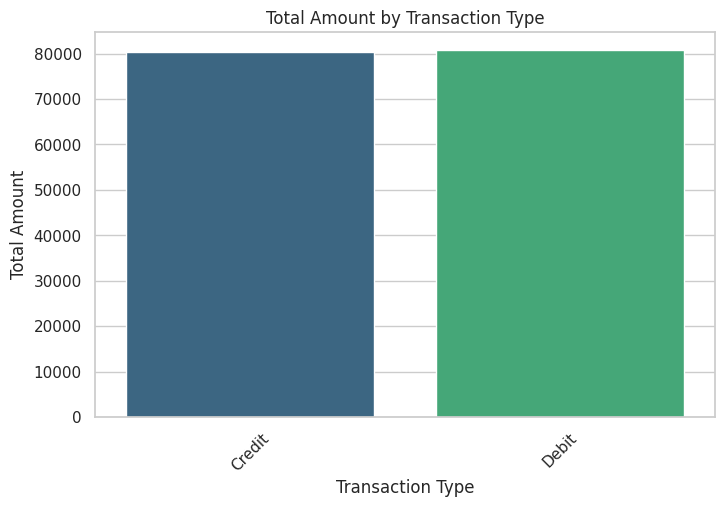

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x=df.groupby("transaction_type")["amount"].sum().index,
            y=df.groupby("transaction_type")["amount"].sum().values, palette="viridis")
plt.title("Total Amount by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


**Transactions by Status (Count Plot)**

<ipython-input-49-b156b32868ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["status"], palette="pastel")


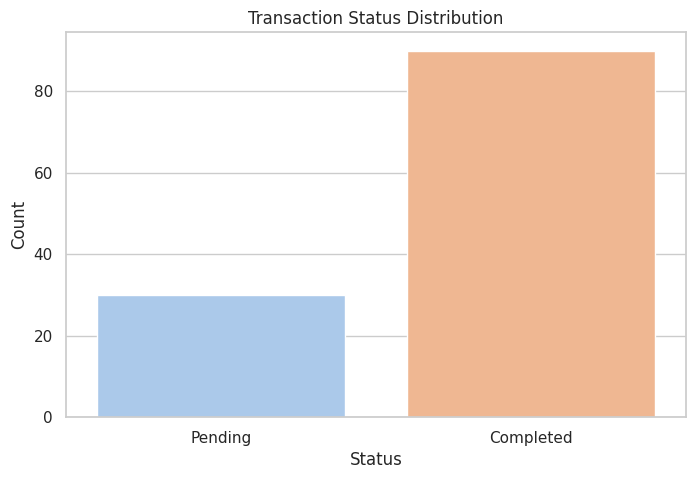

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["status"], palette="pastel")
plt.title("Transaction Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


**Monthly Transactions Over Time (Line Chart)**

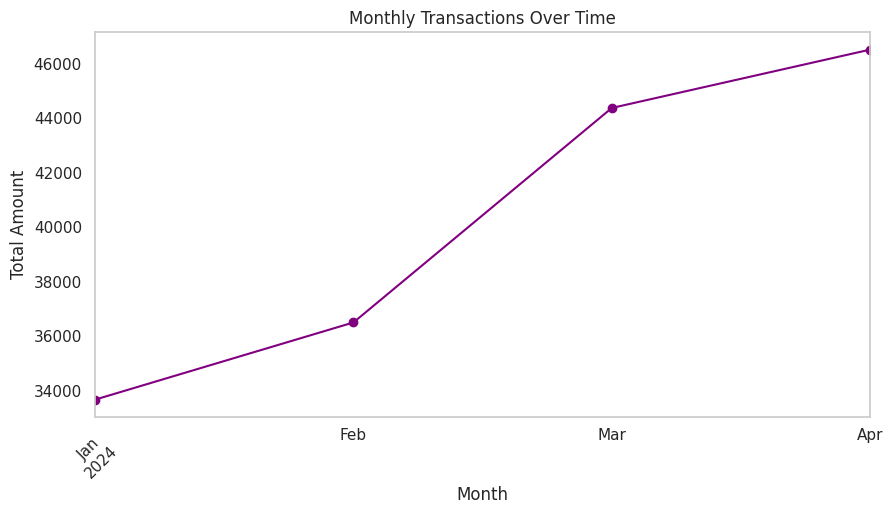

In [50]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df_monthly = df.groupby(df["transaction_date"].dt.to_period("M"))["amount"].sum()

plt.figure(figsize=(10,5))
df_monthly.plot(marker='o', linestyle='-', color='purple')
plt.title("Monthly Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Automate the Workflow to Run Every Week**

In [ ]:
import time
from datetime import datetime

while True:
    print("🔄 Running data pipeline at:", datetime.now())

    # Load the latest transformed data
    file_path = "/content/drive/MyDrive/Colab Notebooks/Target Data/Transformed financial_data.csv"
    df = pd.read_csv(file_path)

    # Apply transformations (if needed)
    df["amount_usd"] = df["amount"] / 82  # Example: Convert INR to USD

    # Save updated file
    output_file = "/content/drive/MyDrive/Colab Notebooks/Target Data/Updated_Transformed_financial_data.csv"
    df.to_csv(output_file, index=False)

    print("✅ Data updated successfully!")

    # Wait 7 days (604800 seconds)
    time.sleep(604800)


🔄 Running data pipeline at: 2025-03-26 10:32:02.395815
✅ Data updated successfully!
